# Import all necessary libraries

In [1]:
import pywt # Library for wavelets operations
import numpy as np # Library for array and matrix manipulations
import math # Librarry for many mathematical operations
import tftb # time-frequency-tool-box - signal processing
from scipy.special import expit
from scipy import misc
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt # Library for ploting
import matplotlib as mpl

# What can we do with wavelet library?

## Wavelet families

At the begining let's explore what kind of wavelet families can we use. PyWavelets give us possibilit to use all of the most common wavelet families.

In [3]:
pywt.families()

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey']

In [4]:
pywt.families(short = False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)']

## Functions 
The family of wavelets contains the dilated and translated versions of a prototype function. Traditionally, the prototype function is called a mother wavelet. Every function is represented both by scalling function and wavelet function. We can easly list those functions and plot theme as weel.

In [5]:
pywt.wavelist('db') # To explore familie list we use short name of the familly function as argument

['db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20']

In [6]:
pywt.wavelist('haar')

['haar']

### We can obtain details of certain function

In [7]:
db2 = pywt.Wavelet('db2')

In [8]:
print db2

Wavelet db2
  Family name:    Daubechies
  Short name:     db
  Filters length: 4
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric


In [9]:
db7 = pywt.Wavelet('db7')

In [11]:
print db7

Wavelet db7
  Family name:    Daubechies
  Short name:     db
  Filters length: 14
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric


In [12]:
haar = pywt.Wavelet('haar')

In [13]:
print haar

Wavelet haar
  Family name:    Haar
  Short name:     haar
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric


### Ploting functions

The wavefun() method can be used to calculate approximations of scaling function (phi) and wavelet function (psi) at the given level of refinement. For orthogonal wavelets returns approximations of scaling function and wavelet function with corresponding x-grid coordinates:

### Orthogonal and biorthogonal functions
They have the same decomposition and reconstructing functions

In [14]:
def plot_orthogonal_wavelet_aprox(wavelet, level):
    phi, psi, x = wavelet.wavefun(level)
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    f.set_size_inches(15,4)
    ax1.plot(x,phi, color = 'red', label = 'Scalling')
    ax2.plot(x, psi, color = 'green', label = 'Wavelet')
    ax1.set_title('Scalling function', color = 'red')
    ax2.set_title('Wavelet function', color ='green')

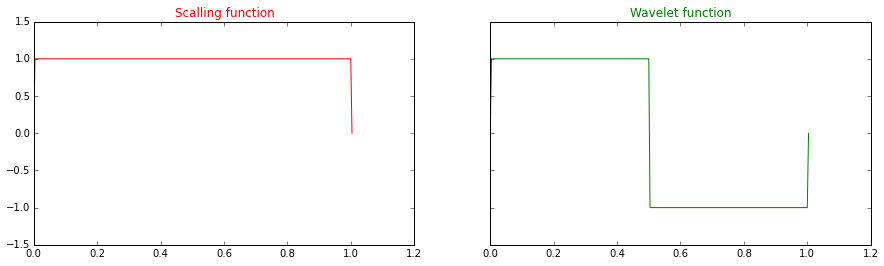

In [15]:
plot_orthogonal_wavelet_aprox(haar, level=8)

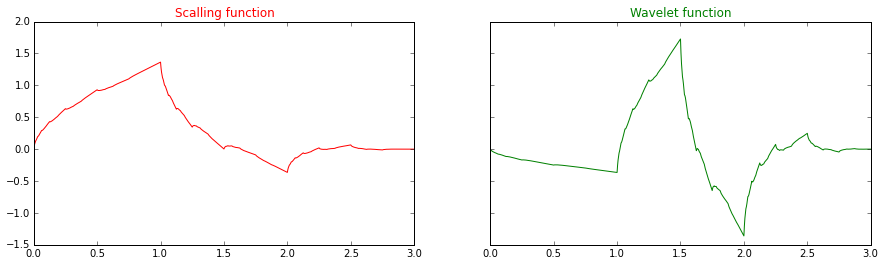

In [16]:
plot_orthogonal_wavelet_aprox(db2, level=8)

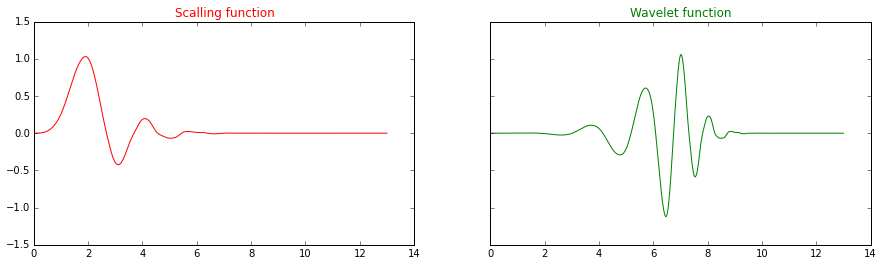

In [18]:
plot_orthogonal_wavelet_aprox(db7, level=8)

### Biorthogonal but not orthogonal
Bioorthogonal but not orthogonal functions, have diferent reconstructing and decompositing functions. Lets explore theme and plot

In [19]:
pywt.wavelist('rbio')

['rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',
 'rbio3.3',
 'rbio3.5',
 'rbio3.7',
 'rbio3.9',
 'rbio4.4',
 'rbio5.5',
 'rbio6.8']

In [21]:
rbio_5_5 = pywt.Wavelet('rbio5.5')

In [22]:
print(rbio_5_5)

Wavelet rbio5.5
  Family name:    Reverse biorthogonal
  Short name:     rbio
  Filters length: 12
  Orthogonal:     False
  Biorthogonal:   True
  Symmetry:       symmetric


In [23]:
def plot_not_orthogonal_wavelet_aprox(wavelet, level):
    phi_d, psi_d, phi_r, psi_r, x = wavelet.wavefun(level)
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
    f.set_size_inches(15,8)
    ax1.plot(x, phi_r, color = 'red', label = 'Scalling')
    ax1.set_title('Reconstruction scalling', color ='red')
    ax2.plot(x, psi_r, color = 'green', label = 'Wavelet')
    ax2.set_title('Reconstruction wavelet', color ='green')
    ax3.plot(x, phi_d, color = 'blue', label = 'Scalling')
    ax3.set_title('Decomposition scalling', color ='blue')
    ax4.plot(x, psi_d, color = 'orange', label = 'Wavelet')
    ax4.set_title('Decomposition wavelet', color ='orange')

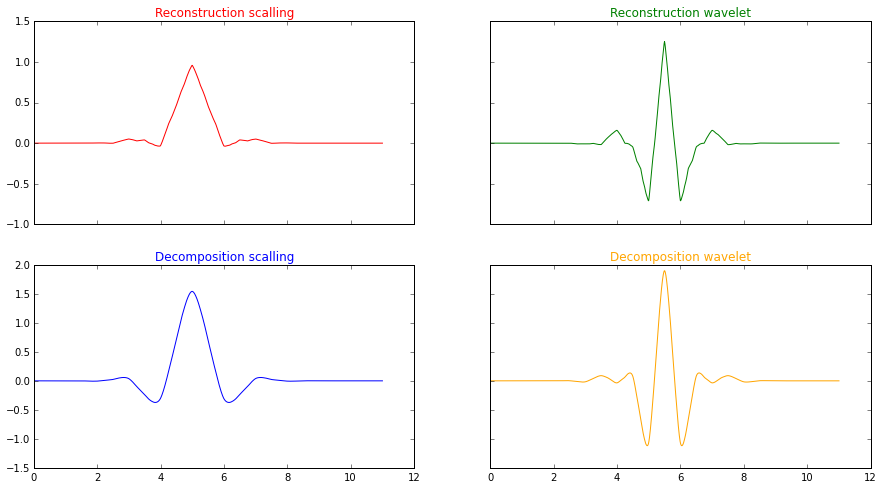

In [25]:
plot_not_orthogonal_wavelet_aprox(rbio_5_5, 10)

### You can check that and many more on site:
### http://wavelets.pybytes.com/ 

### Familly evolution
We can see how mother function evoluates in a family by dilatation and translation

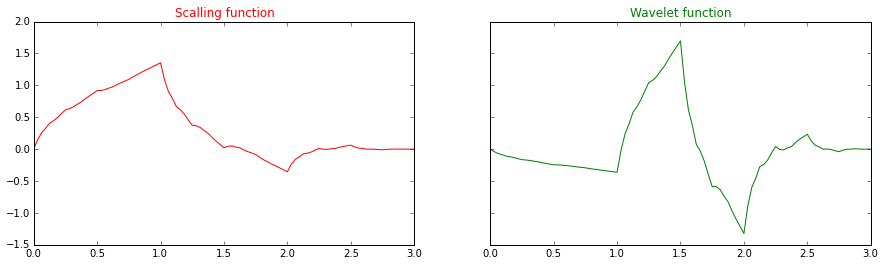

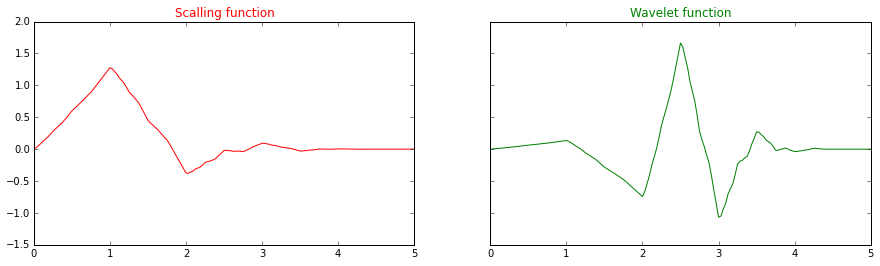

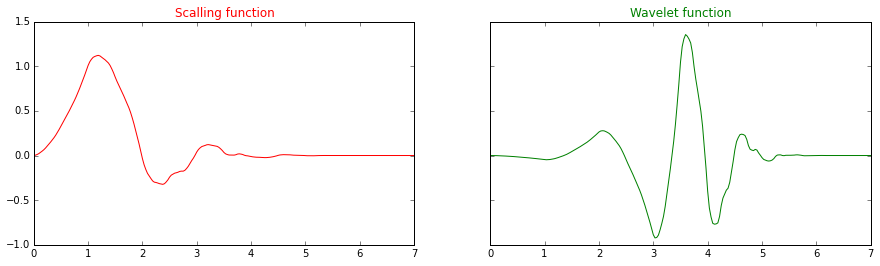

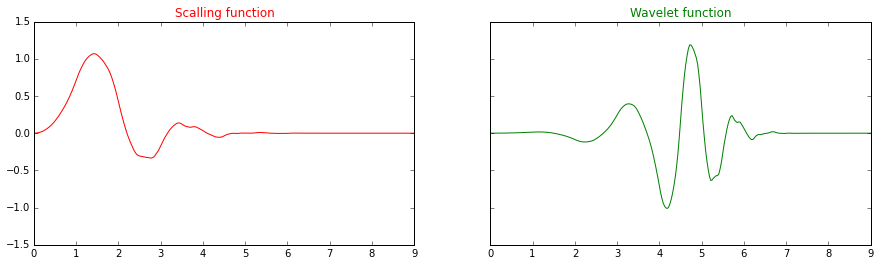

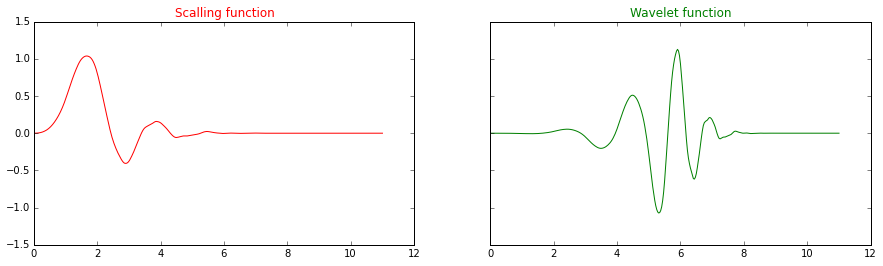

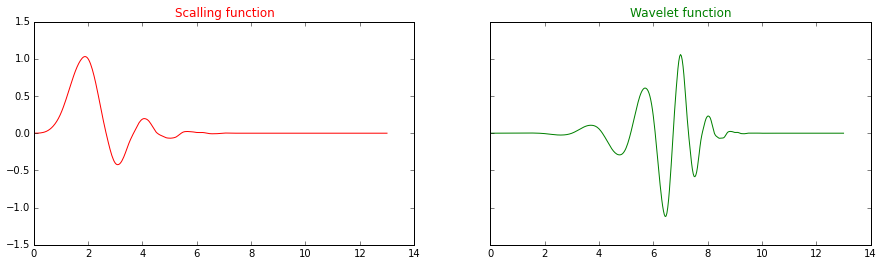

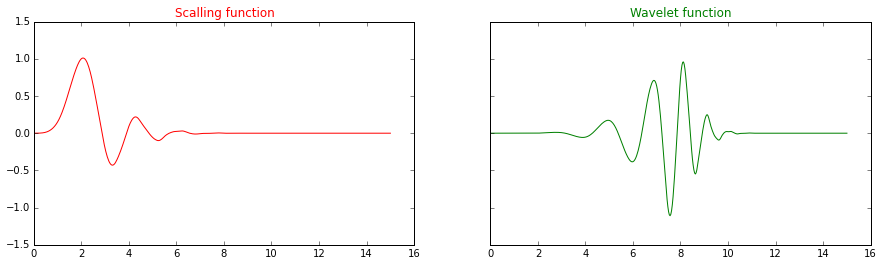

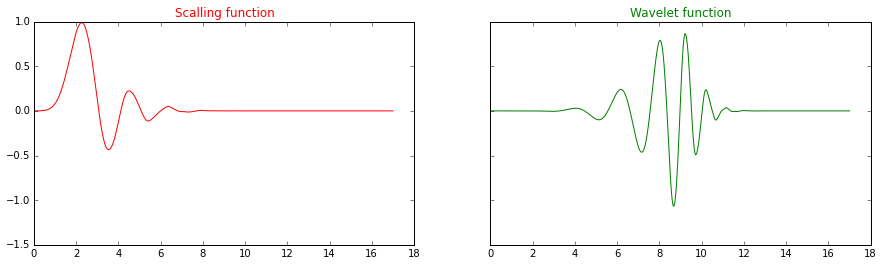

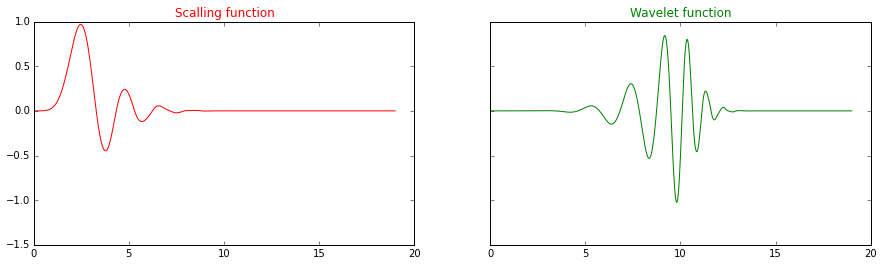

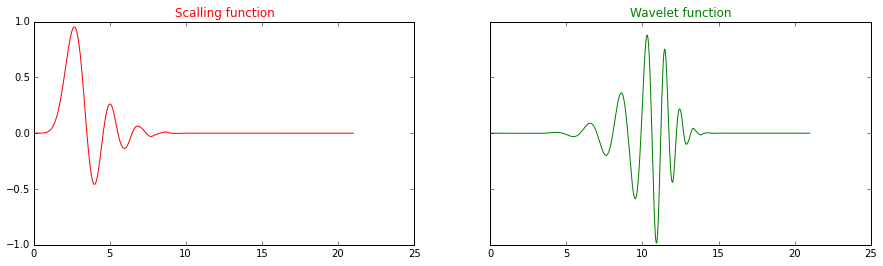

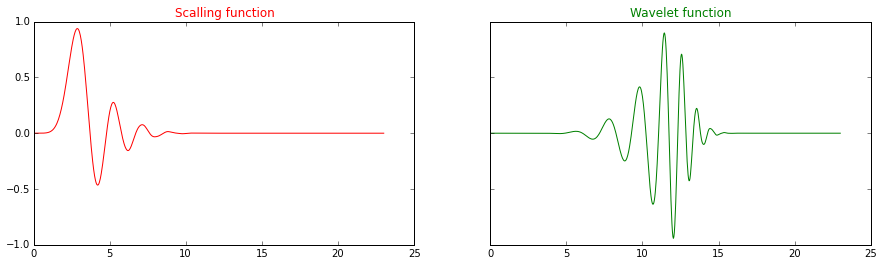

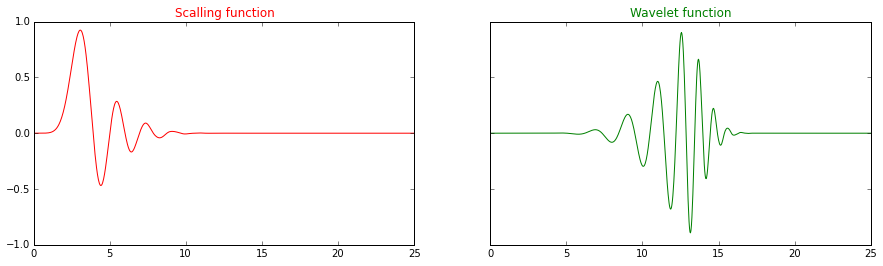

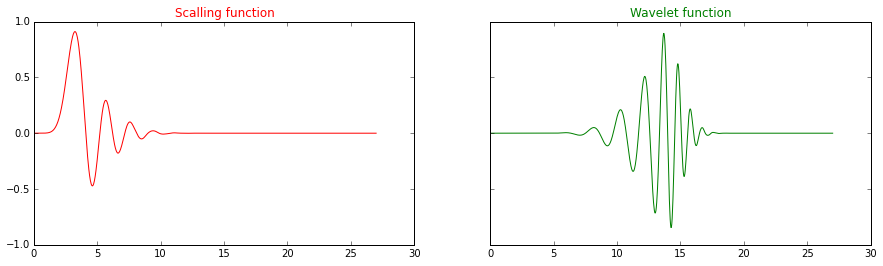

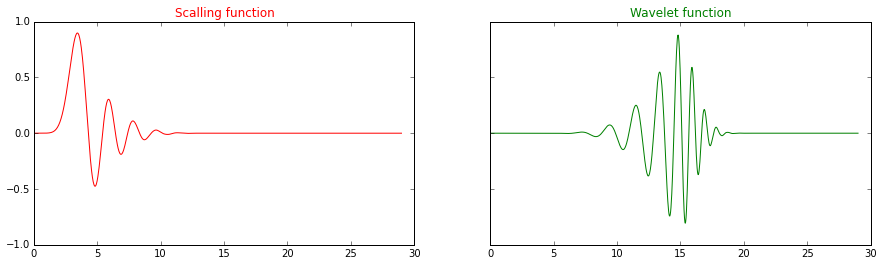

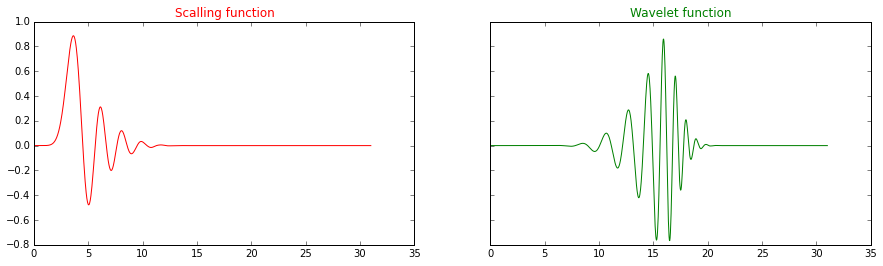

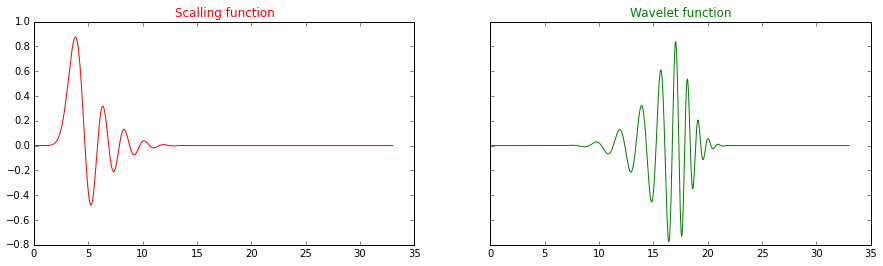

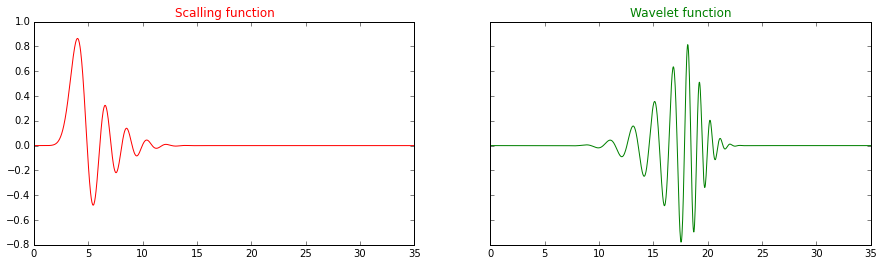

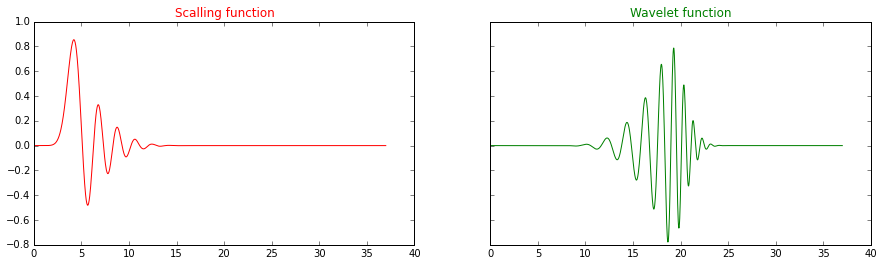

In [26]:
for i in range(2, len(pywt.wavelist('db'))):
    db = pywt.Wavelet('db'+str(i))
    plot_orthogonal_wavelet_aprox(db,5)

## Wavelet transform

The wavelet transform computes the inner products of a signal with a wavelet. We use the discrete wavelet tools for both signal analysis and signal processing, such as noise reduction, data compression, peak detection and so on.

###Benefits of Wavelet Signal Processing
Wavelet signal processing is different from other signal processing methods because of the unique properties of wavelets. For example, wavelets are irregular in shape and finite in length (Fourier Transform is based on sin functions which are regular and infinit length). Wavelet signal processing can represent signals sparsely, capture the transient features of signals, and enable signal analysis at multiple resolutions.

### Discrete Wavelet Transform (DWT) of 1-d signal
At the begining we will confront DWT. We will perform single level and multilevel discrete wavelet transformation. We will find aproximation and details of given signal in 1-d.

First we will generate a signale to work on. Let it be simple sinusoidal signal with constant frequency, and we will merge some noise with it

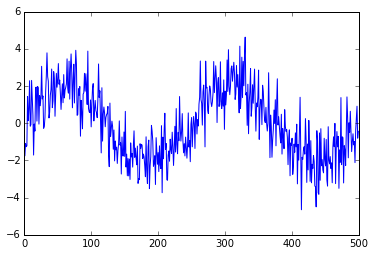

In [27]:
freq = 50
time_period = 1./freq
time = time_period * 2
amplitude = 2

t = np.linspace(0, time, 500)
x = 2*3.14*freq*t 

yc = amplitude * np.sin(x) + np.random.randn(len(x))
plt.plot(yc)

To perform single level decomposition of a signal we can use dwt function from pywt library. Function returns aproximation of given 1-d signal and its first decomposition. We will use earlier explored daubechies family function. 

In [28]:
ca, cd =pywt.dwt(yc,'db5')

We can inspect what We have got

In [30]:
print len(yc)    
print len(ca)
print len(cd)

500
254
254


As we see signal was scaled. We can perform few level decomposition of aproximated function and then we will plot it to see what is going on with aproximated signal.

In [31]:
ca2, cd2 = pywt.dwt(ca,'db5')
ca3, cd3 = pywt.dwt(ca2, 'db5')
print len(ca2)
print len(ca3)

131
70


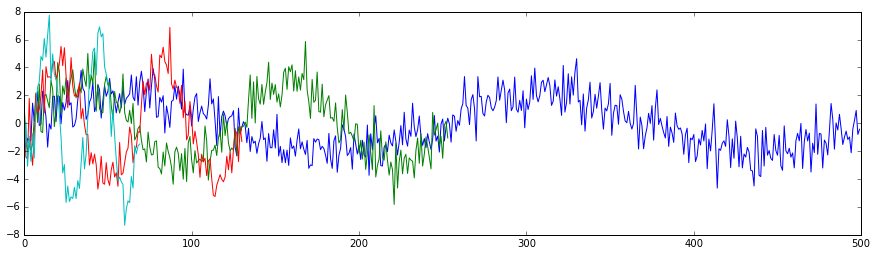

In [32]:
plt.figure(figsize=(15,4))
plt.plot(yc)
plt.plot(ca)
plt.plot(ca2)
plt.plot(ca3)

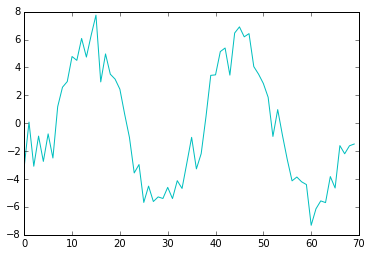

In [33]:
plt.plot(ca3, color='c')

With every decomposition signal is geting smoother. But what would happen if we go deeper?

In [35]:
ca4, cd4 = pywt.dwt(ca3, 'db5')
ca5, cd5 = pywt.dwt(ca4, 'db5')
ca6, cd6 = pywt.dwt(ca5, 'db5')

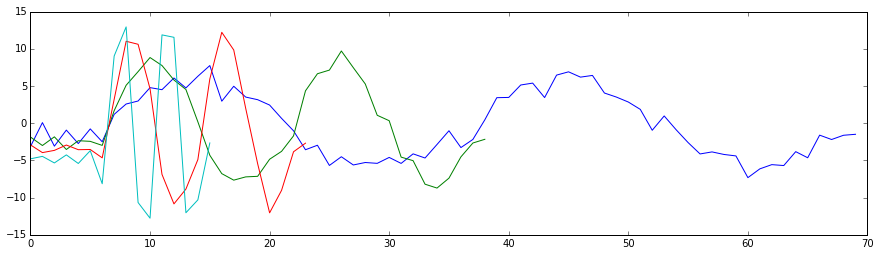

In [36]:
plt.figure(figsize=(15,4))
plt.plot(ca3)
plt.plot(ca4)
plt.plot(ca5)
plt.plot(ca6)

We see that every next aproximation keeps less and less informations. To better understand what is going on we will look into the details of our function decomposition. There goes rest of information about original signal. To do that we will define decomposition coefficients ploting function

In [37]:
def plot_decomposition_coefficients(coeffs):
    colors=['b','g','r','c','m','y','k']
    f, ax =plt.subplots(len(coeffs),1,sharex=True)
    f.set_size_inches(15,2*len(coeffs))
    ax[0].plot(coeffs[0], color='blue', label="aproximated coeff")
    ax[0].legend()
    for i in xrange(1, len(coeffs)):
        ax[i].plot(coeffs[i], color=colors[i%7], label=("detailed coeff level:"+str(len(coeffs)-i)))
        ax[i].legend()

In [38]:
coeffs = [ca4, cd4, cd3, cd2, cd]

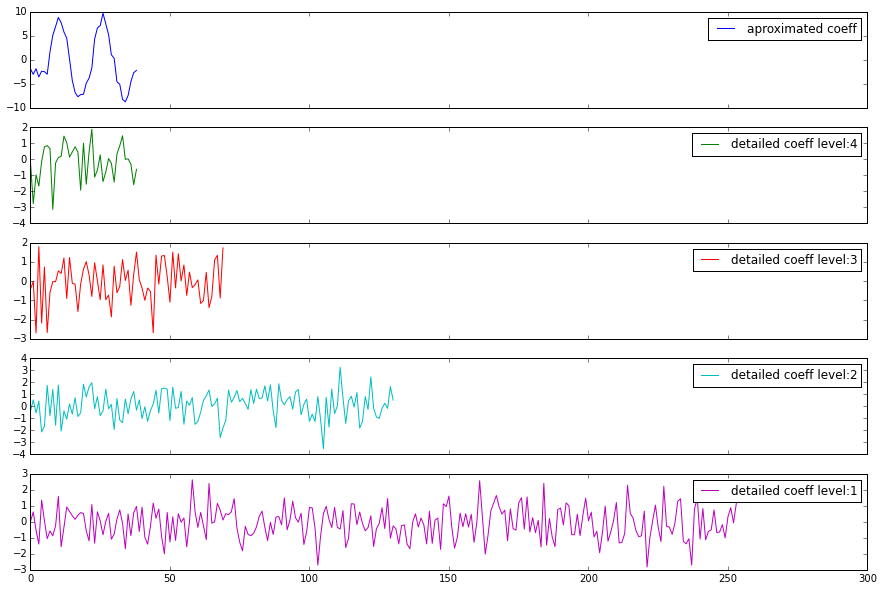

In [41]:
plot_decomposition_coefficients(coeffs)

Insted of performing multiple single level decomposition we can perform at once multiple level decomposition to get aproximated function and all the detailes to do that we can use pywt.wavedec. 

In [42]:
ca4, cd4, cd3, cd2, cd1 = coeffs = pywt.wavedec(yc, 'haar', level=4)

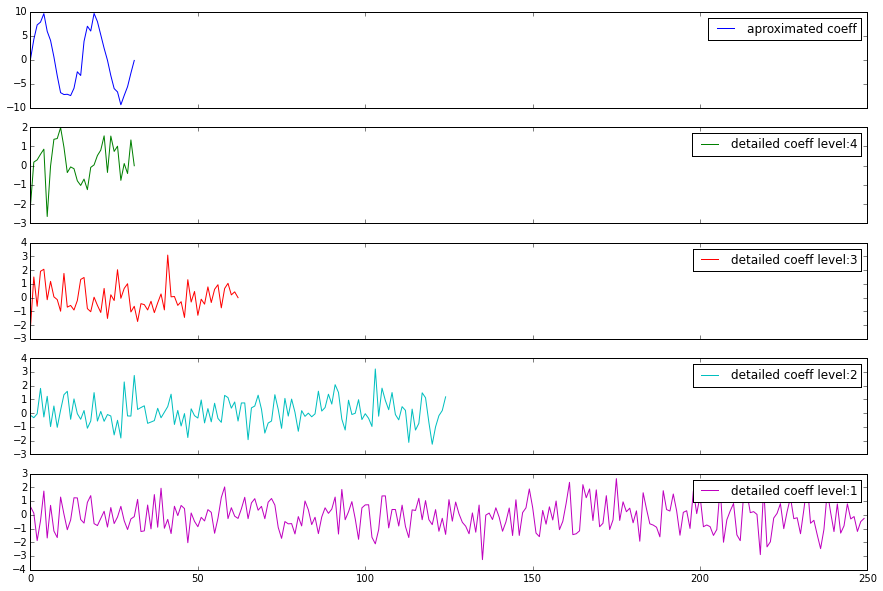

In [43]:
plot_decomposition_coefficients(coeffs)

To get only aproximation at given level or details at given level, We can use Partial Discrete Wavelet Transform data decomposition by calling function downcoef. 'a' returns aproximation, 'd' return details

In [44]:
aprox_coeff = pywt.downcoef('a', yc, 'sym5', level=4)
detail_coeff = pywt.downcoef('d', yc, 'sym5', level=4)

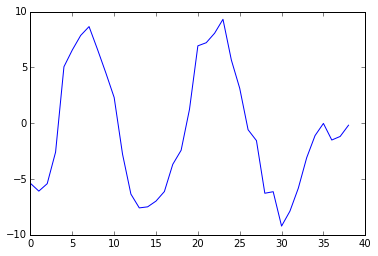

In [45]:
plt.plot(aprox_coeff)

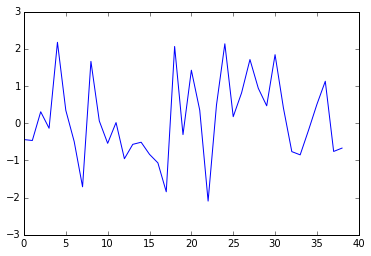

In [46]:
plt.plot(detail_coeff)

### Inverse Discret Wavelet Transformation IDWT of 1-d signal
We probably would like to reconstruct our original signal after doing some operations on deecomposed detailsed or aproximation. To do that we can call to IDWT. In PyWavelets there is function caled idwt to do single level of reconstruction and function called waverec to do multiple level reconstruction. 

To perform our reconstruction we will use coefficients gained by decomposition earlier

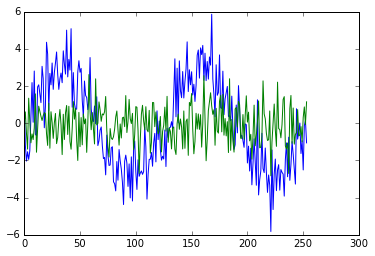

In [47]:
plt.plot(ca)
plt.plot(cd)

In [48]:
rec_yc = pywt.idwt(ca,cd, 'db5')

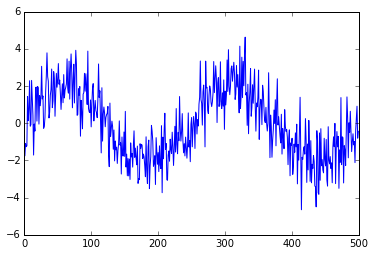

In [49]:
plt.plot(rec_yc)

We can compute MSE on our reconstruction to check it similarity with the original signal

In [50]:
print("mean squered error:",metrics.mean_squared_error(yc, rec_yc))

('mean squered error:', 2.3736967732126886e-24)


We see MSE is so small that it could be easly caused by numerical errors

Let's perform multiple level reconstruction and check MSE then

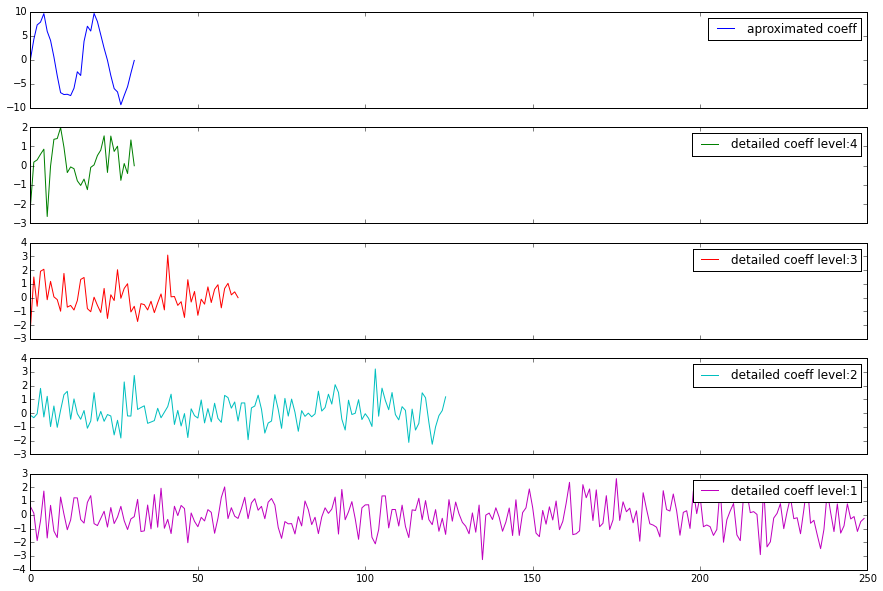

In [51]:
plot_decomposition_coefficients(coeffs)

In [52]:
rec_yc = pywt.waverec(coeffs, 'haar')

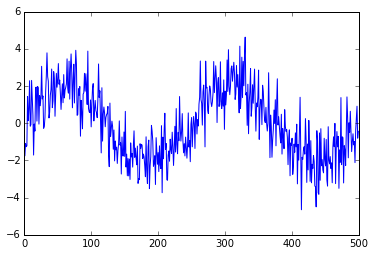

In [53]:
plt.plot(rec_yc)

In [54]:
print("mean squered error:",metrics.mean_squared_error(yc, rec_yc))

('mean squered error:', 7.6124191426053222e-31)


Mean squered error this time is even smaller than earlier

### Discrete Wavelet Transform (DWT) of 2-d signal
Now we can go further to 2-d DWT. similarly as in case of 1-d signal we can call functions which perform as well single level (dwt2) and multiple level (wavdec2) transformations. When We call 2-d signal wavelet transformation our matrix is scaled both in x and y direction. Details we get corresponds to horrizontal, vertical and diagonal To perform 2-d signal operations we will use images in gray scale.

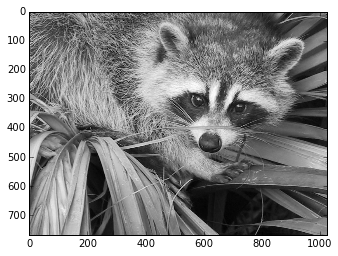

In [55]:
face = misc.face(gray = True)
plt.imshow(face, cmap=plt.cm.gray)

Explore shape of our image ('L' stands for Long data type). 

In [56]:
face.shape

(768L, 1024L)

Decompose our image, define function to print coefficients and check sizes of decomposed elements

In [57]:
(ca, (cd11, cd12, cd13)) = coeffs = pywt.dwt2(face, 'db2')

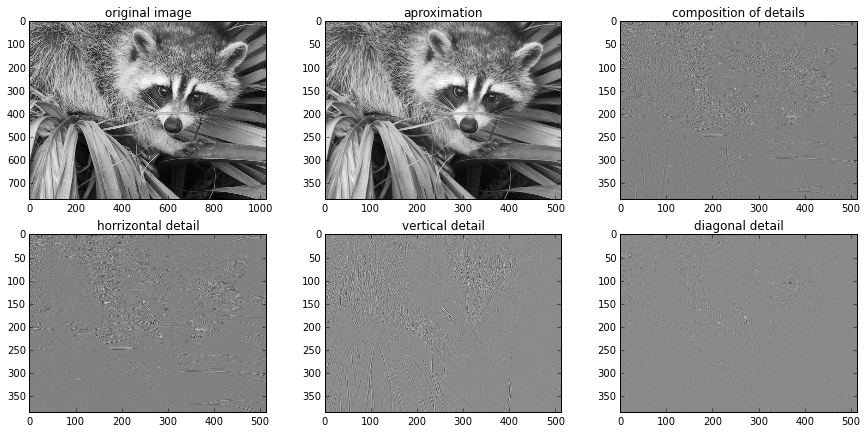

In [58]:
def plot_matrix_coeff(image, coeffs):
    ca,(cd11, cd12, cd13) = coeffs
    fig = plt.figure(figsize=(15,7))
    a=fig.add_subplot(2,3,4)
    a.imshow(cd11, cmap=plt.cm.gray)
    a.set_title('horrizontal detail')
    a=fig.add_subplot(2,3,5)
    a.set_title('vertical detail')
    a.imshow(cd12, cmap=plt.cm.gray)
    a=fig.add_subplot(2,3,6)
    a.set_title('diagonal detail')
    a.imshow(cd13, cmap=plt.cm.gray)
    a=fig.add_subplot(2,3,1)
    a.imshow(image, cmap=plt.cm.gray)
    a.set_title('original image')
    a=fig.add_subplot(2,3,2)
    a.imshow(ca, cmap=plt.cm.gray)
    a.set_title('aproximation')
    a=fig.add_subplot(2,3,3)
    a.imshow(sum(coeffs[1]), cmap=plt.cm.gray)
    a.set_title('composition of details')
plot_matrix_coeff(face, coeffs)

Let's now perform multiple single level decomposition and check what is going on with every step

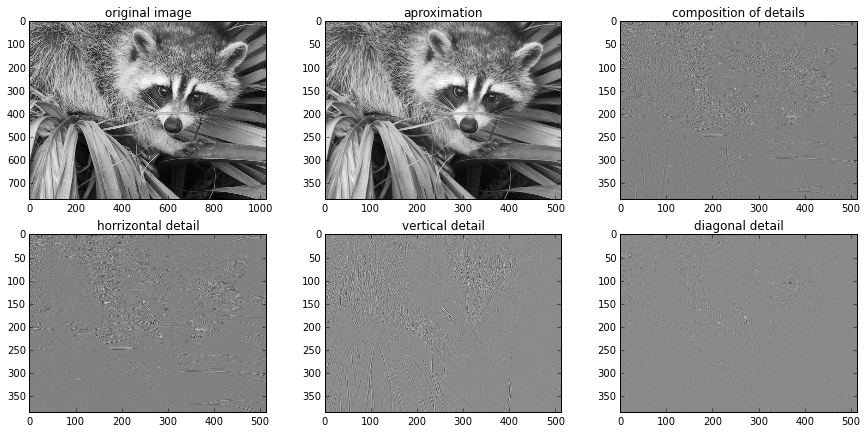

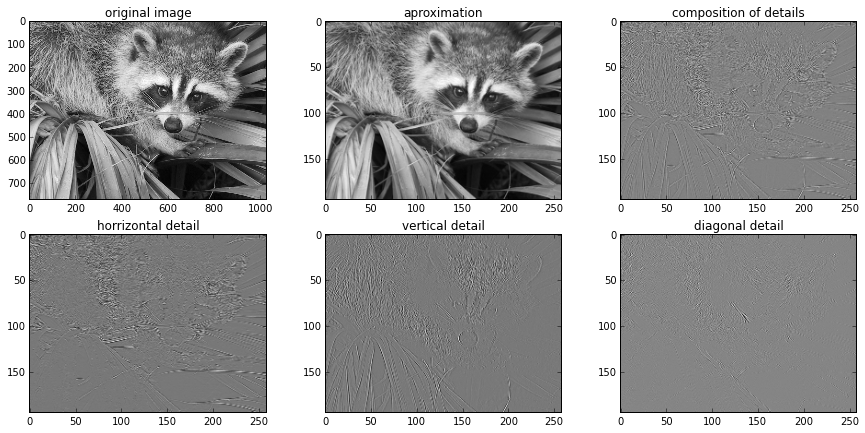

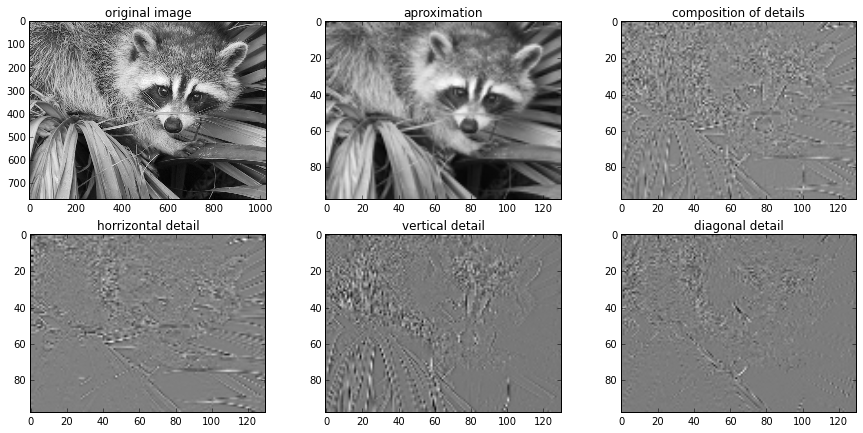

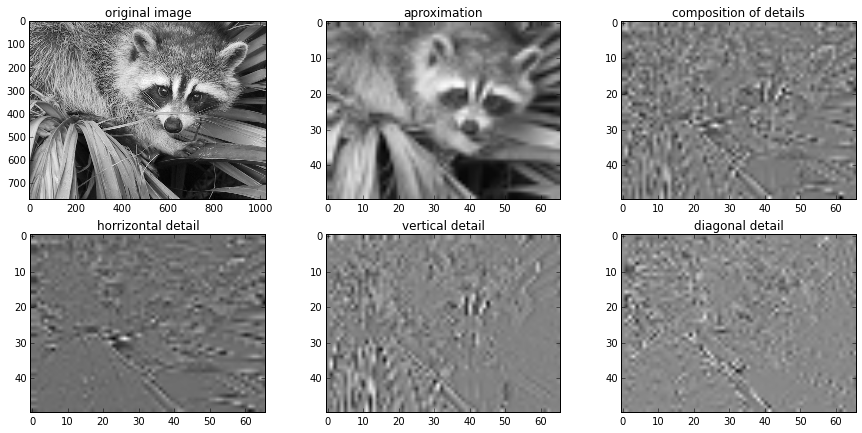

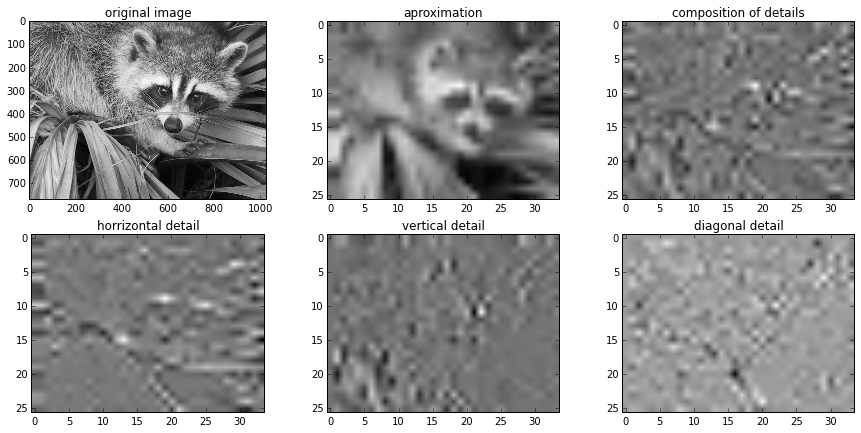

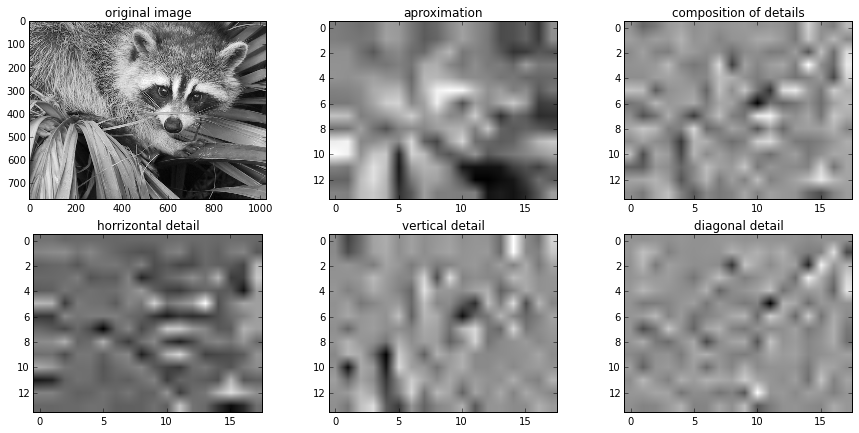

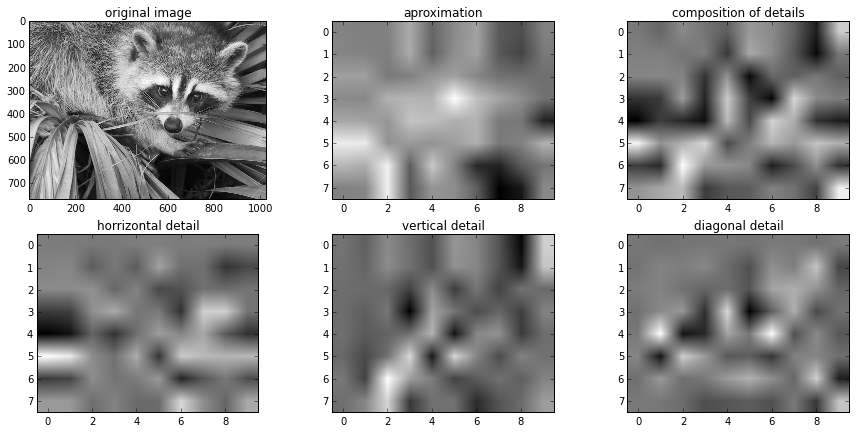

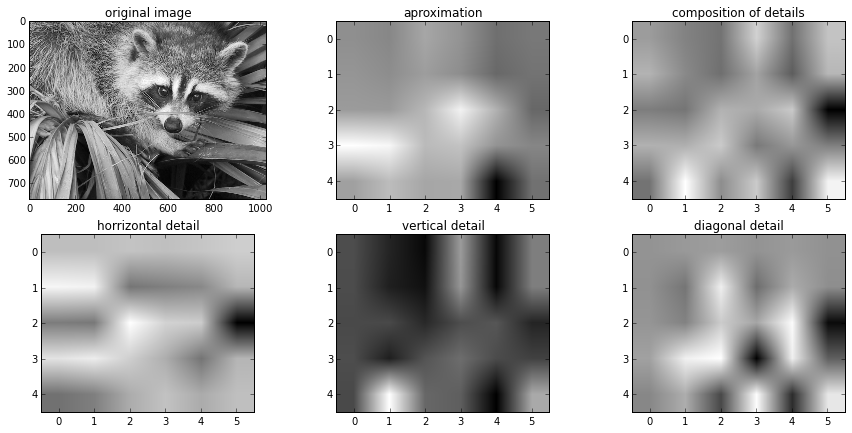

In [60]:
coeffs = pywt.dwt2(face, 'db2')
plot_matrix_coeff(face, coeffs)
for i in xrange(7):
    coeffs = pywt.dwt2(coeffs[0], 'db2')
    plot_matrix_coeff(face,coeffs)

We can now perform multiple level decomposition

In [63]:
coeffs = pywt.wavedec2(face, 'haar', level=4)

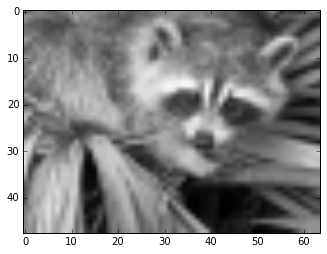

In [64]:
plt.imshow(coeffs[0], cmap='gray')

All details are stored in list of triples

In [65]:
len(coeffs)

5

### Inverse Discret Wavelet Transformation IDWT of 2-d signal
Similarly as with 1-d signal now we will perform IDWT to reconstruct our original image and check MSE to see how well they match with each other. To do that we can use functions waverec2 and idwt2. We will use gathered earlier coefficients

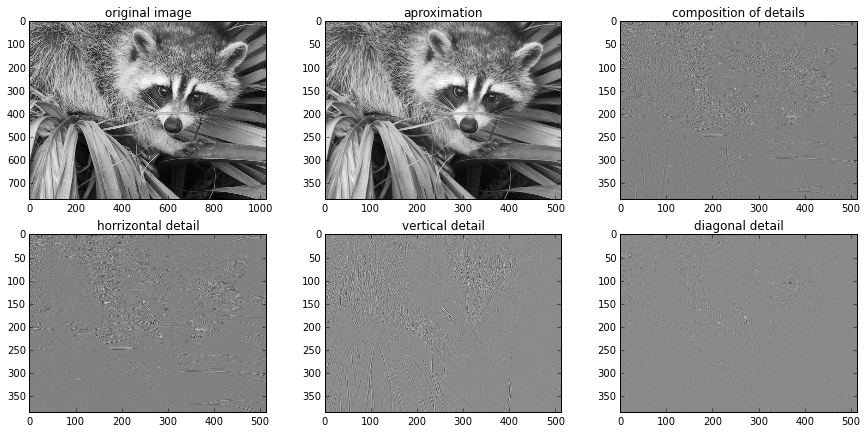

In [66]:
plot_matrix_coeff(face, [ca, (cd11, cd12, cd13)])

In [67]:
face_rec = pywt.idwt2([ca, (cd11, cd12, cd13)], 'db2')

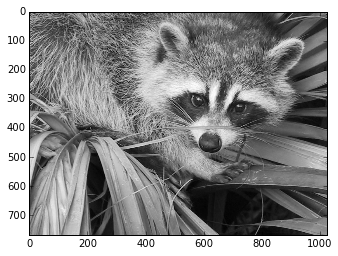

In [68]:
plt.imshow(face_rec, cmap='gray')

In [69]:
print("mean squered error:",metrics.mean_squared_error(face_rec, face))

('mean squered error:', 2.627801459766195e-22)


Again we see that error is very very low, kind of numeriacal. Same as with 1-d signal we will repeat this for multiple level reconstruction

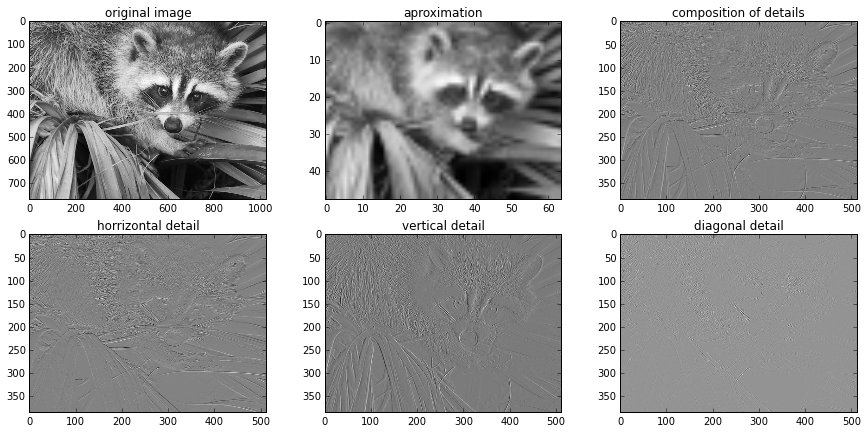

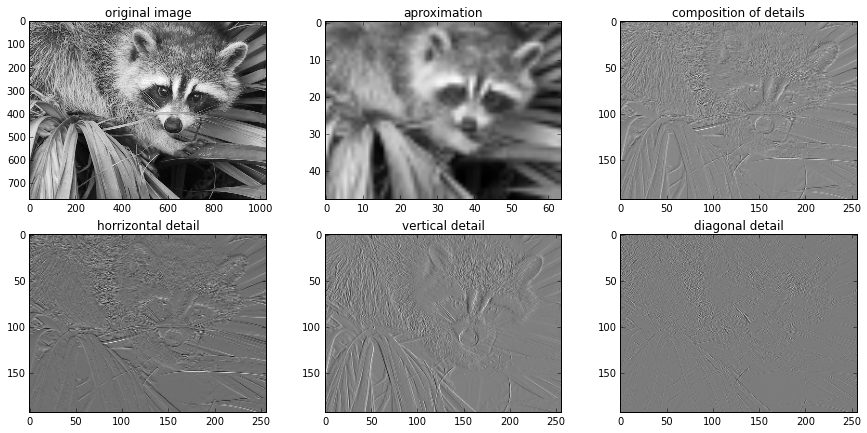

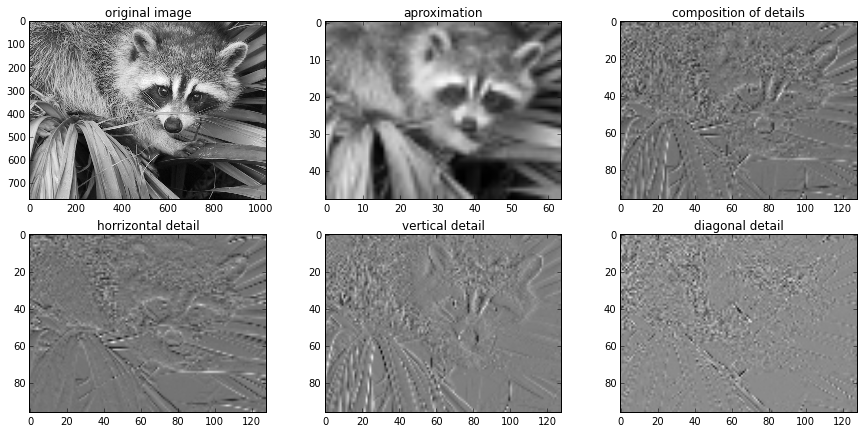

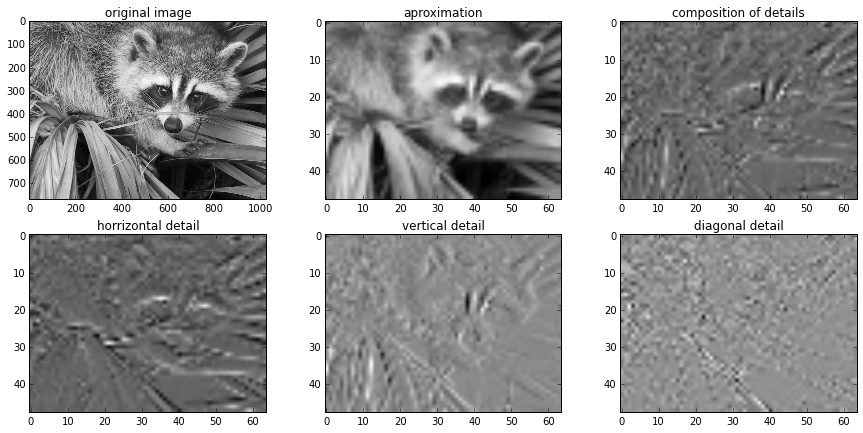

In [70]:
for i in xrange(1, len(coeffs)):
    plot_matrix_coeff(face, [coeffs[0],coeffs[-i]]) 
        

In [72]:
face_rec = pywt.waverec2(coeffs, 'haar')

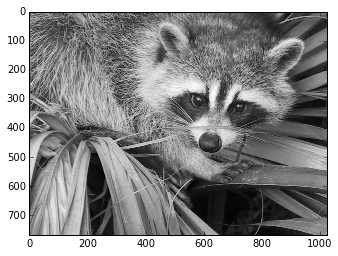

In [73]:
plt.imshow(face_rec, cmap='gray')

In [74]:
print("mean squered error:",metrics.mean_squared_error(face_rec, face))

('mean squered error:', 1.9910951373912529e-26)


Situation is the same as earlier

## Noise removal
### Generating signal

In this section we will create more complicated signal than earlier.

First we need to generate frequencie modulation signal. We will create this signal using generator modul from tftb. We would create signal which is liniary decresing in its frequency 

In [75]:
fm, _ = tftb.generators.fmlin(512,0.0,0.08) # parameters: 512 samples, 0 starting frequency, 0.08 final frequency 
reversed_fm = fm[::-1] # we would like this signal to be decresing so we bind variable to reverse with numpy fm var 

Let's plot this signal

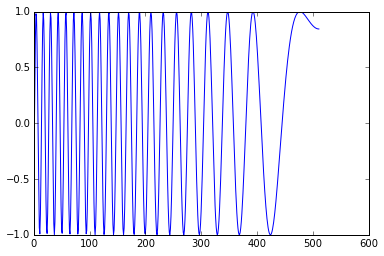

In [76]:
plt.plot(np.real(reversed_fm))

Now we need to generate amplitude modulation signal. To do that we will use numpy linspace which generate liniary incressing table, and then treat it by sigmoid function

In [77]:
am = np.linspace(-3,5,512) #values changing from -3 to 5, 512 samles
am = expit(am)

Let's plot this signal as well

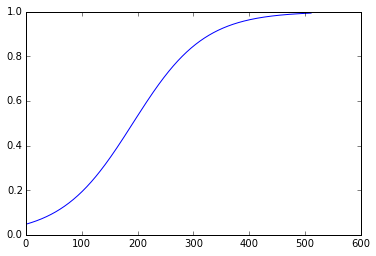

In [78]:
plt.plot(am)

Now we can get out final clean signal by combaining thise two signals 

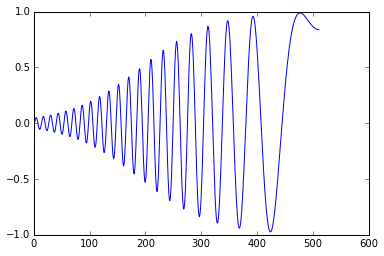

In [80]:
clean_signal = am*reversed_fm
plt.plot(np.real(clean_signal))

###  Make the noise! :)

To do that we will use once again tftb.generators module. In this module we have two functions doing that:

a) noisecg - complex white or coloured gaussian noise

b) noisecu - complex white uniform noise

In [81]:
noise = tftb.generators.noisecg(512,.8) # 512 number of samples, 0.8 coefficient of autoregresive filtere coloring the noise 

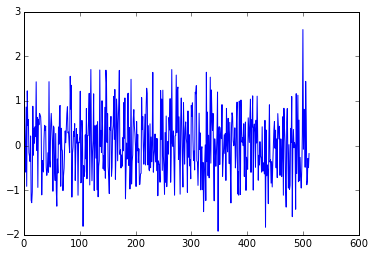

In [82]:
plt.plot(noise)

Now we need to merge clean signal with created noise. We will use once again tftb.generators. This time we need to use sigmerge function which is merging two signals with given signal to noise ration given in dB

In [83]:
noised_signal = tftb.generators.sigmerge(clean_signal, noise, -5)

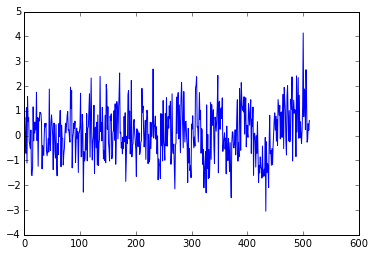

In [84]:
plt.plot(noised_signal)

### Noise removal essential part
In this part we will finally try to remove noise from given signal.

1. Things we need to think about:
        -which wavelet to choose 
        -how deep in decomposition should we go
2. Decompose signal to given level
3. Define the thresholds on all the levels and eliminate small wavelet coefficients of all the details.
        -soft treshold
        -hard treshold
4. Complete wavelet reconstruction by means of approximation and remaining coefficients of the details. 

Let's choose proper wavelet.
Sym wavelets look kind of simillar to the signal we put noise on. So maybe we can try one of them

In [85]:
pywt.wavelist('sym')

['sym2',
 'sym3',
 'sym4',
 'sym5',
 'sym6',
 'sym7',
 'sym8',
 'sym9',
 'sym10',
 'sym11',
 'sym12',
 'sym13',
 'sym14',
 'sym15',
 'sym16',
 'sym17',
 'sym18',
 'sym19',
 'sym20']

In [86]:
sym = pywt.Wavelet('sym7')

In [87]:
print sym

Wavelet sym7
  Family name:    Symlets
  Short name:     sym
  Filters length: 14
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       near symmetric


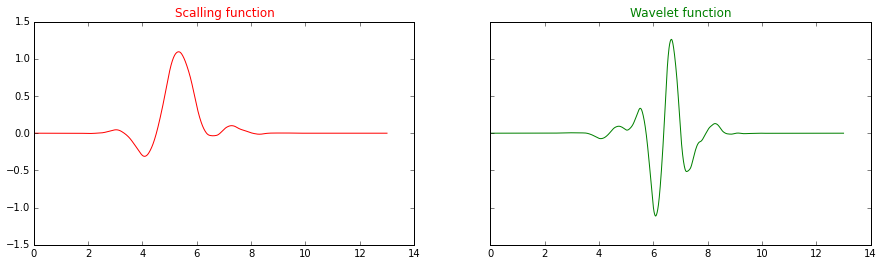

In [88]:
plot_orthogonal_wavelet_aprox(sym,8)

When we have choosen wavelet we would like to use. Then we have to choose how deep should we go in decomposition. We saw earlier that 4 level of decomposition gives nice aproximation for similar function so maybe we will go down to this level

In [89]:
c_a, c_d4, c_d3, c_d2, c_d1 = coeffs = pywt.wavedec(noised_signal, 'sym8', level=4)

We can plot our decomposition

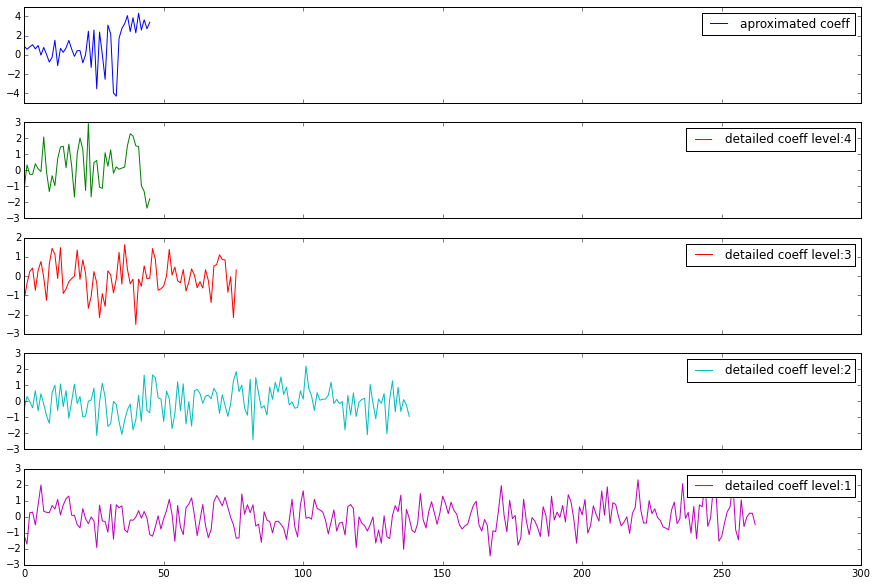

In [90]:
plot_decomposition_coefficients(coeffs)

Now when we decomposed signal we have to think about threshold. It seams reasonable to choose value coresponding somehow to signal we woudl like to denoise. Let's take 1/2 of maximal signal amplitude and apply soft thresholding on every level.

In [91]:
threshold = max(noised_signal)/2
c_d4_thr = pywt._thresholding.soft(c_d4, threshold)
c_d3_thr = pywt._thresholding.soft(c_d3, threshold)
c_d2_thr = pywt._thresholding.soft(c_d2, threshold)
c_d1_thr = pywt._thresholding.soft(c_d1, threshold)
coeffs_thr = [c_a, c_d4_thr, c_d3_thr, c_d2_thr, c_d1_thr]

Let's plot our decomposition after thresholding

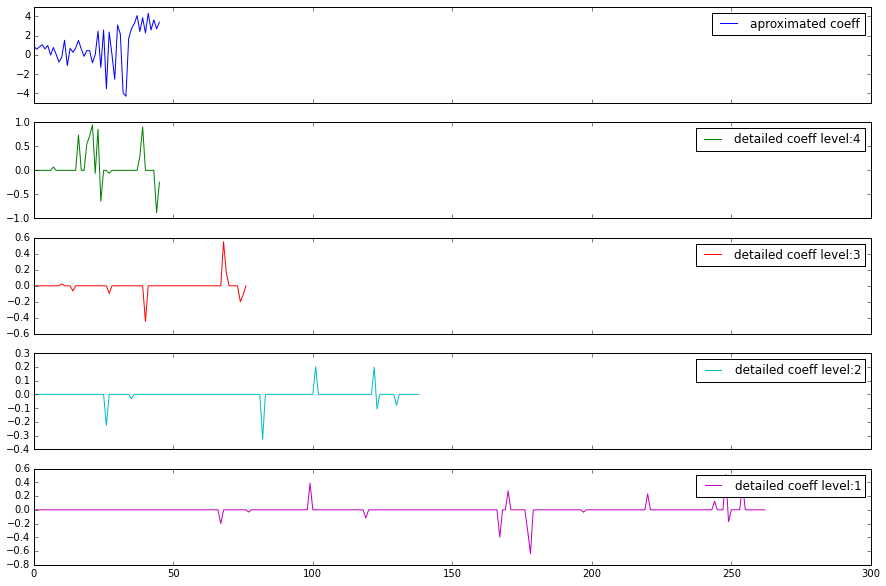

In [92]:
plot_decomposition_coefficients(coeffs_thr)

Nevertheless we ca present this values more efficiently. We will declare function to do that

In [93]:
def interpolate_coefs_to_same_length(coeff_1, coeff_2):
    real_coeff_1 = np.real(coeff_1)
    real_coeff_2 = np.real(coeff_2)
    interp_len = len(real_coeff_1)
    real_coeff_2_x = np.linspace(0,len(real_coeff_2),len(real_coeff_2))
    real_coeff_2_interp_x = np.linspace(0,len(real_coeff_2), interp_len)
    real_coeff_2_interp_y = np.interp(real_coeff_2_interp_x, real_coeff_2_x, real_coeff_2)
    return real_coeff_2_interp_y

In [94]:
def plot_detailed_decomposition_coefficients(coeffs, coeffs_thr, thr):
    number_of_details = len(coeffs)-1
    length_of_longest_detail = len(np.real(coeffs[-1]))
    fig = plt.figure(figsize=(15, number_of_details*3))
    max_y =[]
    interp_details = [np.real(coeffs[-1])]
    interp_thr_details = [np.real(coeffs_thr[-1])]
    for detail in xrange(1, number_of_details):
        max_y.append(max(np.real(coeffs[-detail])))
        interp_details.append(np.abs(interpolate_coefs_to_same_length(coeffs[-1], coeffs[-detail-1])))
        interp_thr_details.append(np.abs(interpolate_coefs_to_same_length(coeffs_thr[-1], coeffs_thr[-detail-1])))
    interp_details.append(np.abs(interpolate_coefs_to_same_length(coeffs[-1], coeffs[1])))
    max_y=max(max_y)
    interp_thr_details.append(np.abs(interpolate_coefs_to_same_length(coeffs_thr[-1], coeffs_thr[1])))
    for detail in xrange(1, number_of_details+1):
        ax = plt.subplot2grid((4, number_of_details),(detail-1, 0), rowspan=1, colspan=1)
        ax.plot(coeffs[-detail], color='green')
        ax.axhline(threshold,color='orange',linestyle='--')
        ax.axhline(-threshold,color='orange',linestyle='--')
        ax.set_ylim(-max_y, max_y)
        ax.set_xticks([])
        ax.set_ylabel('Detail:'+str(detail),rotation=90)
        ax.set_axis_bgcolor('black')
        ax.set_xlim(0, len(coeffs[-detail]))
    ax_org_det = plt.subplot2grid((4, number_of_details),(0, 1),rowspan=number_of_details//2,colspan=3)
    ax_thr_det = plt.subplot2grid((4, number_of_details),(number_of_details//2, 1),rowspan=number_of_details//2,colspan=3)
    
    X,Y = np.meshgrid(range(length_of_longest_detail),range(number_of_details+1))
    Z = np.array(np.abs(interp_details))
    Z_thr = np.array(np.abs(interp_thr_details))
    
    ax_org_det.pcolormesh(X,Y,Z,cmap = 'copper')
    ax_org_det.set_yticks([i for i in range(number_of_details+1)])
    ax_org_det.set_xlim(0, length_of_longest_detail)
    
    ax_thr_det.pcolormesh(X,Y,Z_thr,cmap = 'copper')
    ax_thr_det.set_yticks([i for i in range(number_of_details+1)])
    ax_thr_det.set_xlim(0, length_of_longest_detail)
    
    plt.show()

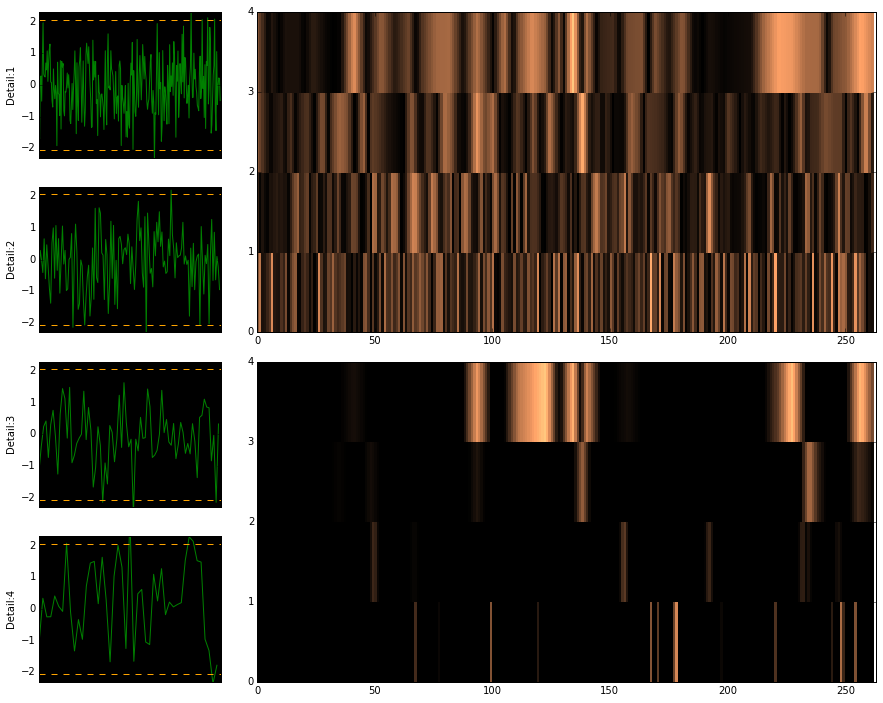

In [95]:
plot_detailed_decomposition_coefficients(coeffs, coeffs_thr, threshold)

Finally we will perform wavelet reconstruction using thresholded details

In [96]:
rec_wave = pywt.waverec(coeffs_thr, 'sym8')

We can plot all of our signals on one plot

In [97]:
def plot_signal_comparision(clean_signal, noised_signal, reconstructed_signal):
    f, ax =plt.subplots(1,1)
    f.set_size_inches(15,7)
    ax.plot(noised_signal, color='blue', label='noised signal')
    ax.plot(reconstructed_signal, color='red', label='reconstructed signal')
    ax.plot(clean_signal, color='yellow', label='original signal')
    ax.legend()

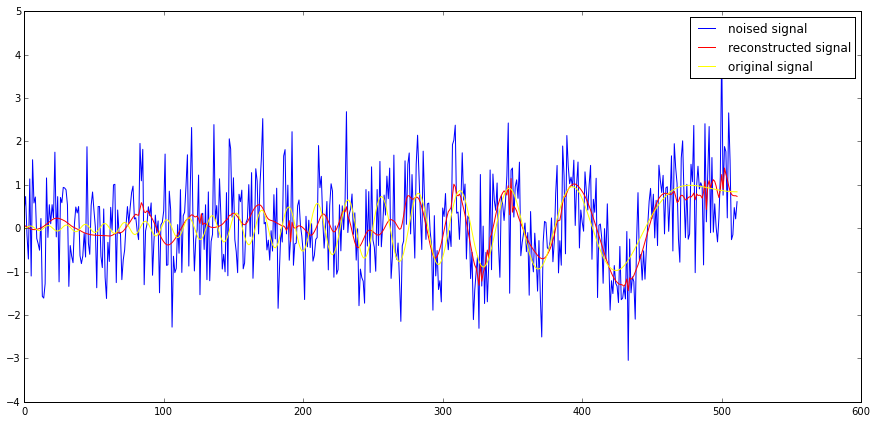

In [98]:
plot_signal_comparision(clean_signal, noised_signal, rec_wave)

### Evaluating
We can evaluate our model using such a metrics as for example mean squered error. We can find this metric in sklearn library

In [99]:
print("mean squered error:",metrics.mean_squared_error(np.real(rec_wave), np.real(clean_signal)))

('mean squered error:', 0.10165873621541052)


### Compare with FFT
To remove noise from signal using FFT. First we need to apply on this signal Fourier Transform. It will transform our signal from time domain to domain of frequencies. Then we can remove frequencies that might be caused because of noise. It means that we get ride of small magnitude frequencies. It might be ok to remove all frequencies that are smaller than 0.75 height of highest frequencie. Then we apply inverse Fourier Transform and we shoudl obtained signal cleaned from noise

In [100]:
ff_signal_freq = np.fft.fft(noised_signal)

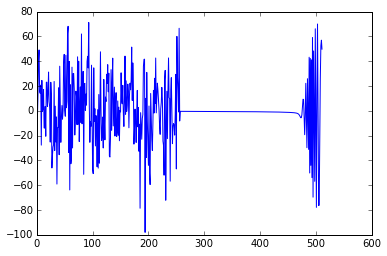

In [102]:
plt.plot(ff_signal_freq)

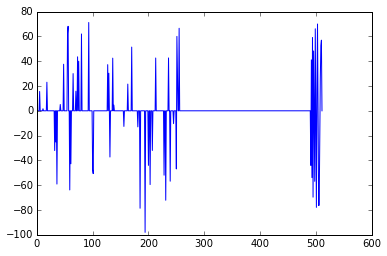

In [103]:
threshold = max(ff_signal_freq)*0.75
freq_trh = pywt._thresholding.hard(ff_signal_freq, threshold)
plt.plot(freq_trh)

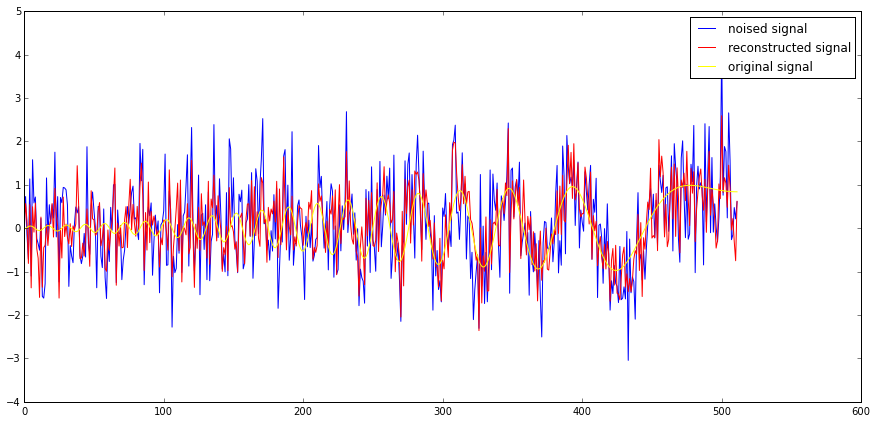

In [104]:
rec_fft = np.fft.ifft(freq_trh)
plot_signal_comparision(clean_signal, noised_signal, rec_fft)

In [105]:
print("mean squered error of FFT based noise removal:",metrics.mean_squared_error(np.real(rec_fft), np.real(clean_signal)))
print("mean squered error of Wavelet based noise removal:",metrics.mean_squared_error(np.real(rec_wave), np.real(clean_signal)))

('mean squered error of FFT based noise removal:', 0.433778330130423)
('mean squered error of Wavelet based noise removal:', 0.10165873621541052)


We can explore how many coefficients of this noised signal have been removed in this proces

In [108]:
def compute_eliminated_coeff_ratio(coeff, coeff_thr):
    eliminated=0
    total = 0
    for i in xrange(1, len(coeff)):
        eliminated += (coeff_thr[i]==0).sum()-(coeff[i] == 0).sum()
        total += len(coeff[i])
    total += len(coeff[0])
    return(float(eliminated)/total)

In [109]:
compute_eliminated_coeff_ratio(coeffs, coeffs_thr)

0.8458844133099825

# Try on your own! :-)
## There is exercises interactive pythone notebook  in which you will meet with some problems which you can now resolve 